In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('accidents.csv')

In [ ]:
df.head()
df.columns

In [4]:
df.shape

(2845342, 47)

In [9]:
boolean_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
bool_df = df[boolean_cols]
not_one_hot = bool_df[bool_df.sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 169133 non one hot metadata rows, which are 5.9% of the data


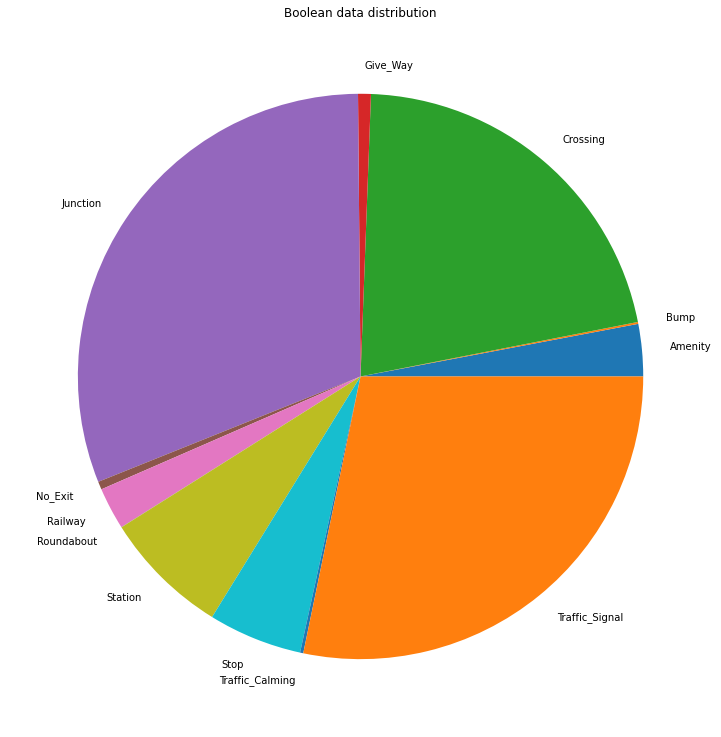

In [10]:
bools = bool_df.sum(axis=0)
bools.plot.pie(figsize=(13,13))
plt.ylabel('')
plt.title('Boolean data distribution');

#### check how much accidents (of each severity level) happened in each year.

In [13]:
# Converting feaure Start_Time to pandas Dateime 
df.Start_Time = pd.to_datetime(df.Start_Time)
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday

<Figure size 1440x576 with 0 Axes>

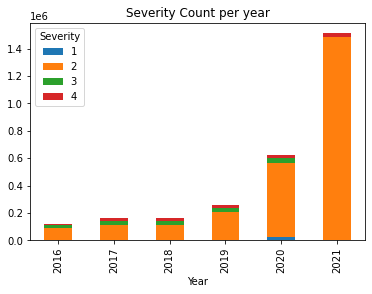

<Figure size 1440x576 with 0 Axes>

In [14]:
# plot bar graph for accidents per year
accidents = df.groupby(['Year', 'Severity']).size().reset_index().pivot(columns='Severity',index='Year', values=0)
accidents.plot(kind='bar', stacked=True, title='Severity Count per year')
plt.figure(figsize=(20,8))

#### Count of States

In [15]:
print("State Code: ", df.State.unique())
print("Total No. of State in Dataset: ", len(df.State.unique()))

State Code:  ['OH' 'IN' 'KY' 'WV' 'MI' 'PA' 'CA' 'NV' 'MN' 'TX' 'MO' 'CO' 'OK' 'LA'
 'KS' 'WI' 'IA' 'MS' 'NE' 'ND' 'WY' 'SD' 'MT' 'NM' 'AR' 'IL' 'NJ' 'GA'
 'FL' 'NY' 'CT' 'RI' 'SC' 'NC' 'MD' 'MA' 'TN' 'VA' 'DE' 'DC' 'ME' 'AL'
 'NH' 'VT' 'AZ' 'UT' 'ID' 'OR' 'WA']
Total No. of State in Dataset:  49


- Total Number of States : 49
- There are 50 states in US
- New York not in dataset

Text(0.5, 1.0, 'States with No. of Accidents')

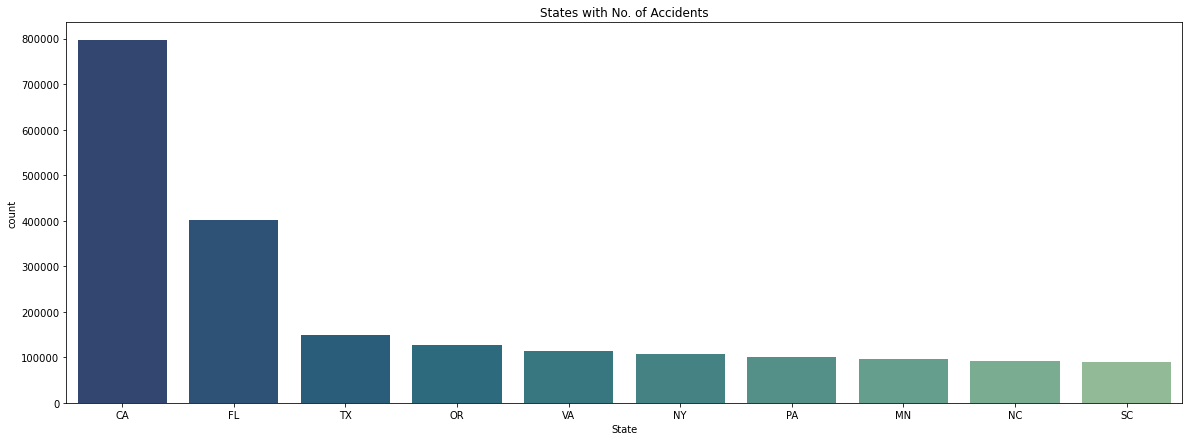

In [16]:
fig, ax = plt.subplots(figsize = (20,7))
states = sns.countplot(x="State", data=df, orient = 'v', palette = "crest_r", order = df['State'].value_counts().iloc[:10].index)
states.set_title("States with No. of Accidents")

## Observation : California is the state with most prone to accidents

#### we will see which state happens to have most number of accidents of severity level 4

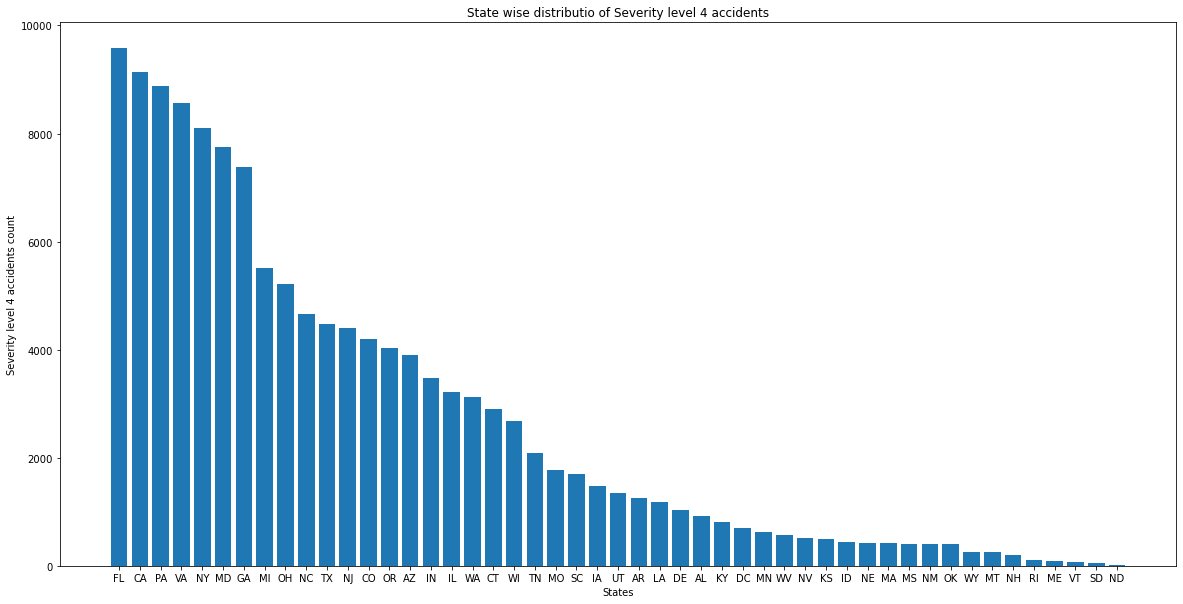

In [17]:
severe_4 = df[df.Severity == 4].State.value_counts().to_frame().reset_index()
severe_4.columns = ['State', 'Accidents']
severe_4 = severe_4.sort_values(by='Accidents', ascending=False)

objects = list(severe_4.State)
y_pos = np.arange(len(objects))
Numbers = list(severe_4.Accidents)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.xlabel('States')
plt.ylabel('Severity level 4 accidents count')
plt.title('State wise distributio of Severity level 4 accidents')
plt.show()

### Obervation : FL and CA consists of majority of the accidents of Severity level 4.

In [19]:
cities = df.City.unique()
len(cities)

11682

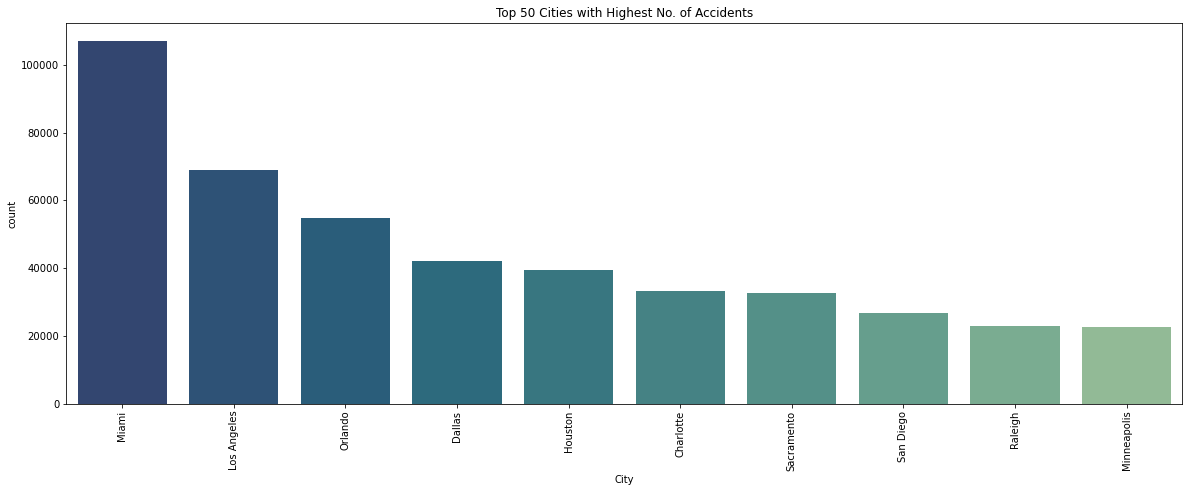

In [20]:
df1 = df.copy()
fig, ax = plt.subplots(figsize = (20,7))
cities = sns.countplot(x="City", data=df, order=df.City.value_counts().iloc[:10].index, orient = 'v', palette = "crest_r")
cities.set_title("Top 50 Cities with Highest No. of Accidents")
cities.set_xticklabels(cities.get_xticklabels(), rotation=90)
plt.show()

## Observation : Miami is the City with most number of accidents

In [22]:
cities_by_accident = df.City.value_counts()

C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

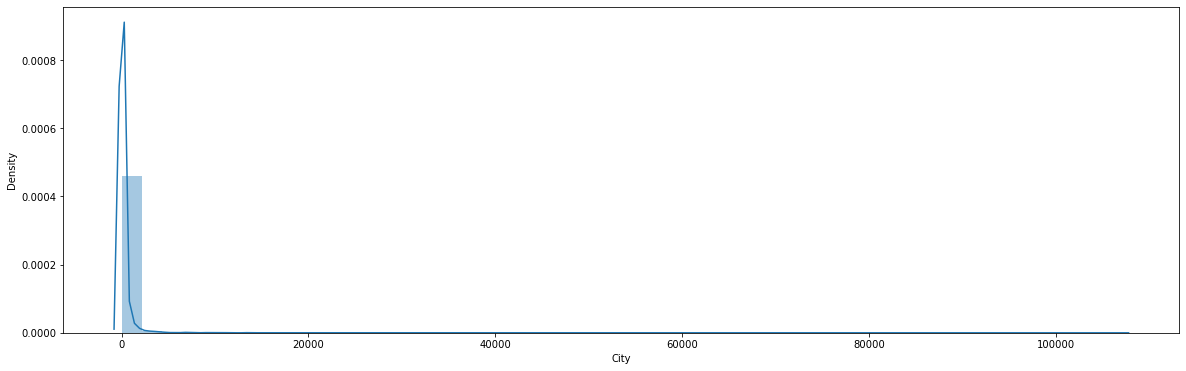

In [23]:
# Most of the ciies has less accidents
fig, ax = plt.subplots(figsize = (20,6))
sns.distplot(cities_by_accident)

In [25]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

## Observation : Less than 4% of cities have more than 1000 yearly accidents

<AxesSubplot:xlabel='City', ylabel='Count'>

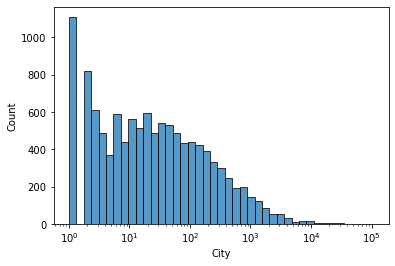

In [26]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
sns.histplot(cities_by_accident, log_scale=True)

## Observation : Number of accidents per city decreases exponentially

In [27]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

## Observation : Around 1100 cities just has reported 1 accident

In [29]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
#yearly data subset 
data_2016 = df[df.Start_Time.dt.year == 2016]
data_2017 = df[df.Start_Time.dt.year == 2017]
data_2018 = df[df.Start_Time.dt.year == 2018]
data_2019 = df[df.Start_Time.dt.year == 2019]
data_2020 = df[df.Start_Time.dt.year == 2020]
data_2017_2019 = df[(df["Year"] >= 2017) & (df["Year"] <= 2019)]

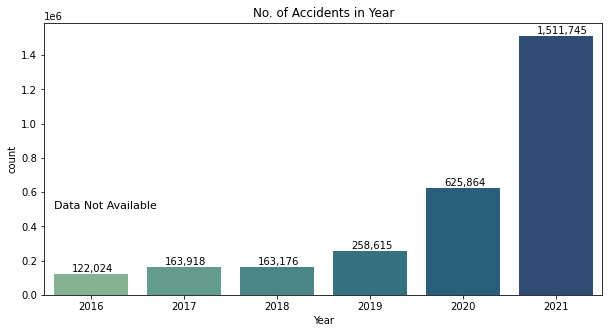

In [30]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=df, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,500000), fontsize=11)
c.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+10000
    ax.annotate(count, (x, y))
plt.show()

C:\Users\Hp\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

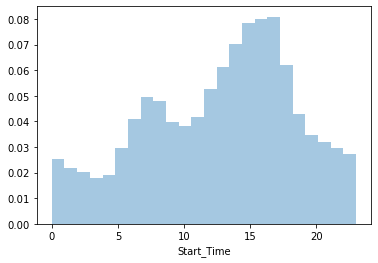

In [31]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

## Observation : Higher Number of accidents occur at morning during 6 AM to 10 AM & at evening during 3 PM to 6 PM 

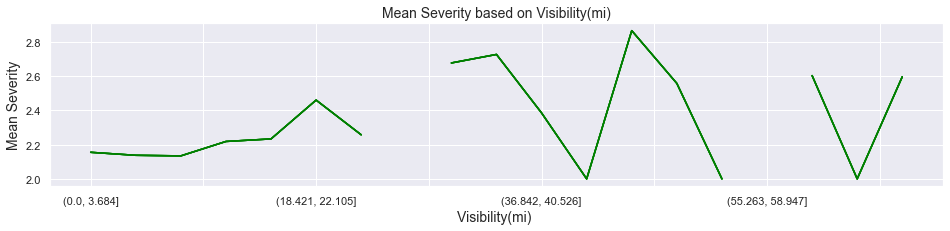

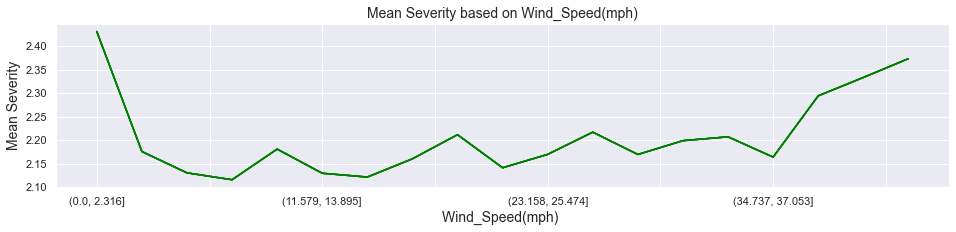

In [83]:
sns.set()
weather_factor = [ 'Visibility(mi)', 'Wind_Speed(mph)']

for factor in weather_factor:
   
    mini = df[factor].quantile(q=0.0001)
    maxi = df[factor].quantile(q=0.9999)
    
    plt.subplots(figsize=(16,3))
    for s in np.arange(1,5):
        df["Severity"].groupby(pd.cut(df[factor], np.linspace(mini,maxi,num=20))).mean().plot(color=['green'])
        plt.title("Mean Severity based on " + factor, fontsize=14)
        plt.xlabel(factor + " ", fontsize=14)
        plt.ylabel("Mean Severity", fontsize=14)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

## Observation :Increasing windspeed(mph) causes accidents of severity 2, which implies even wind speed is also not the major factor for severity 4 accidents.

In [81]:
df['Day_of_Week'] = df['Start_Time'].dt.day_name()

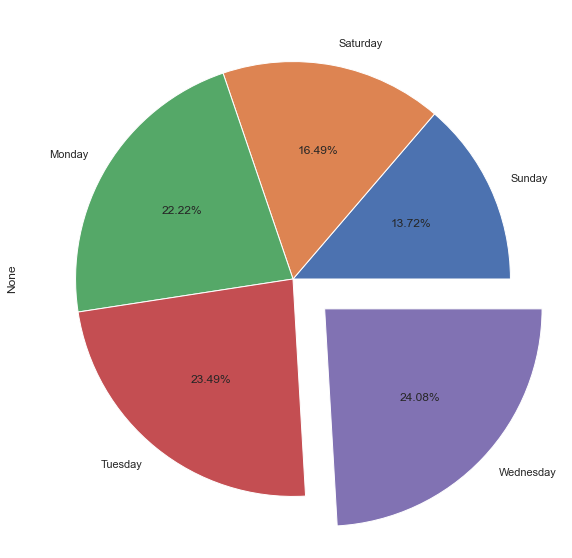

In [82]:
plt.figure(figsize=(16,10))
df.groupby('Day_of_Week') \
        .size() \
        .sort_values(ascending = True) \
        .iloc[:5] \
        .plot.pie(explode=[0,0,0,0,0.2],autopct='%1.2f%%')
plt.ioff()

## Observation : More number of accidents occur during Weekdays than Weekends

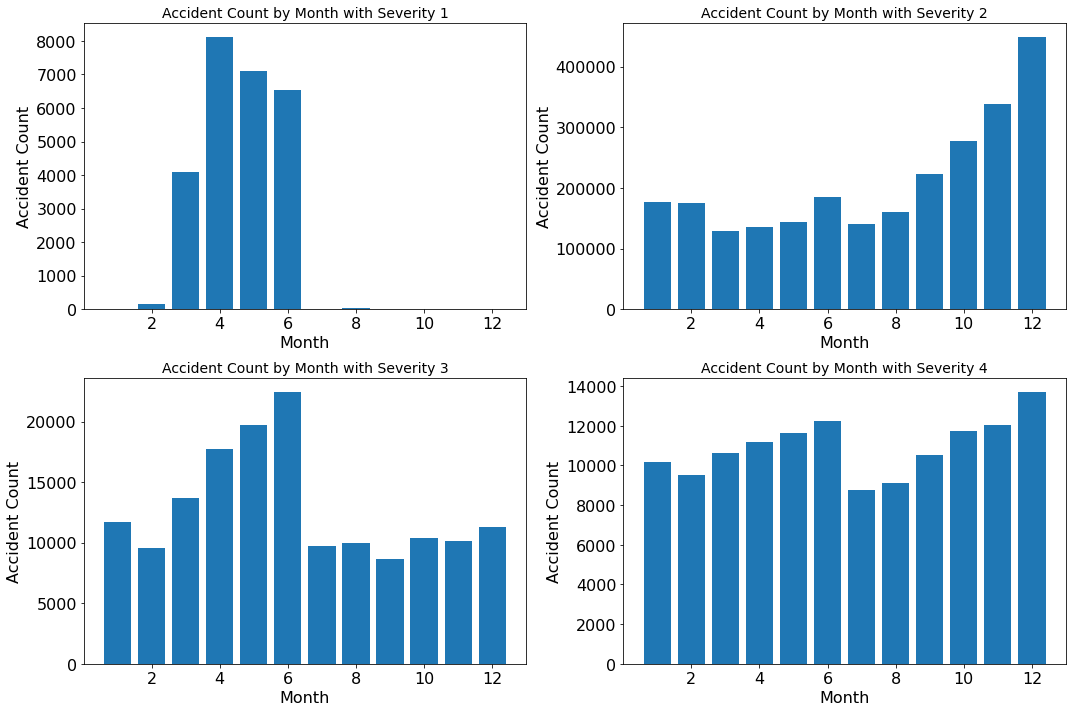

In [71]:
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(df.loc[df["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

 ## Observation : Months October, November and December have highest number of accidents recorded consistently.

In [ ]:
st = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
end = pd.to_datetime(df.End_Time, format='%Y-%m-%d %H:%M:%S')
diff = (end-st)
top20 = diff.astype('timedelta64[m]').value_counts().nlargest(20)
print('top 20 accident durations correspond to {:.1f}% of the data'.format(top20.sum()*100/len(diff)))
(top20/top20.sum()).plot.bar(figsize=(14,14))
plt.title('Accident Duration [Minutes]')
plt.xlabel('Duration in minutes')
plt.ylabel('Fraction');

#### check number of accidents haapening month-wise to check whether we can see any pattern in that

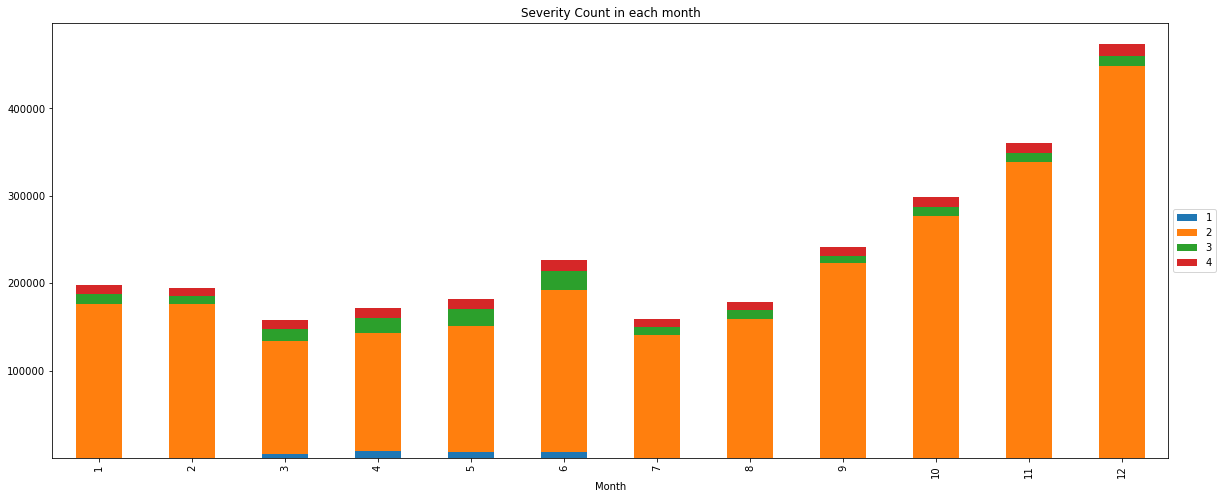

In [38]:
accidents = df.groupby(['Month', 'Severity']).size().reset_index().pivot(columns='Severity', 
                                                                      index='Month', values=0)

accidents.plot(kind='bar', stacked=True, figsize=(20,8), title='Severity Count in each month').legend(loc='center left',
                                                                                                      bbox_to_anchor=(1.0, 0.5))

### Observation : Most of the accidents happened in January to March and then August to December.

#### check the number of accidents based on the weather condition.

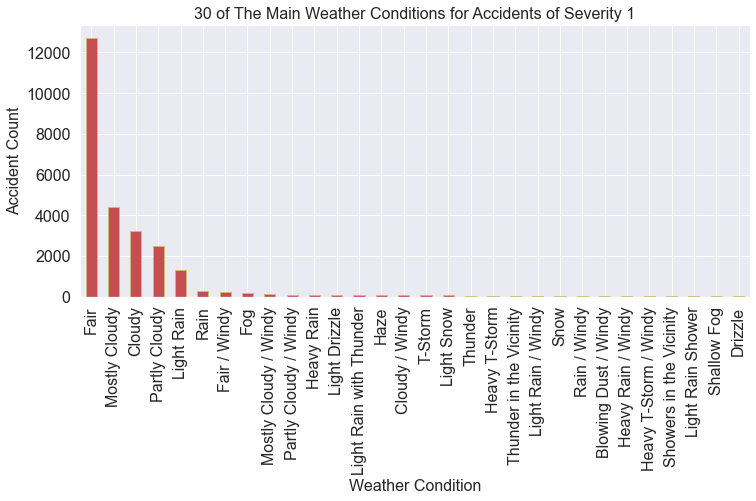

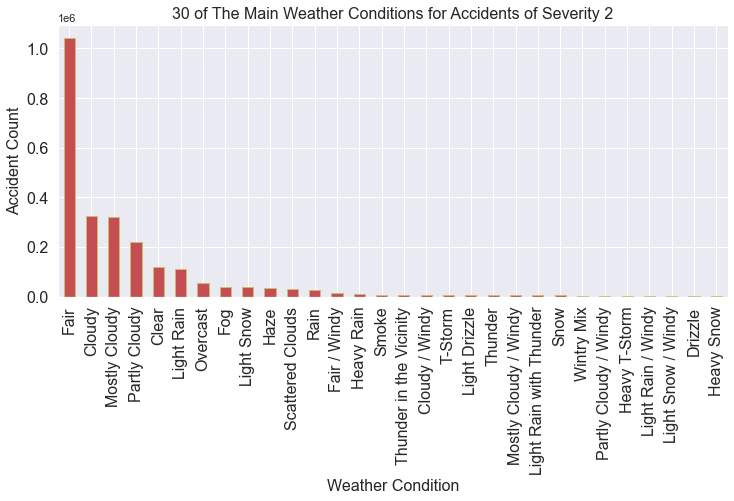

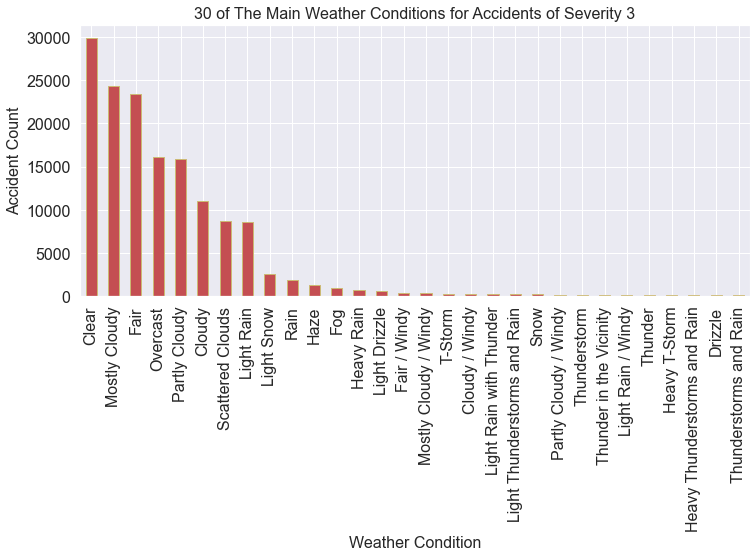

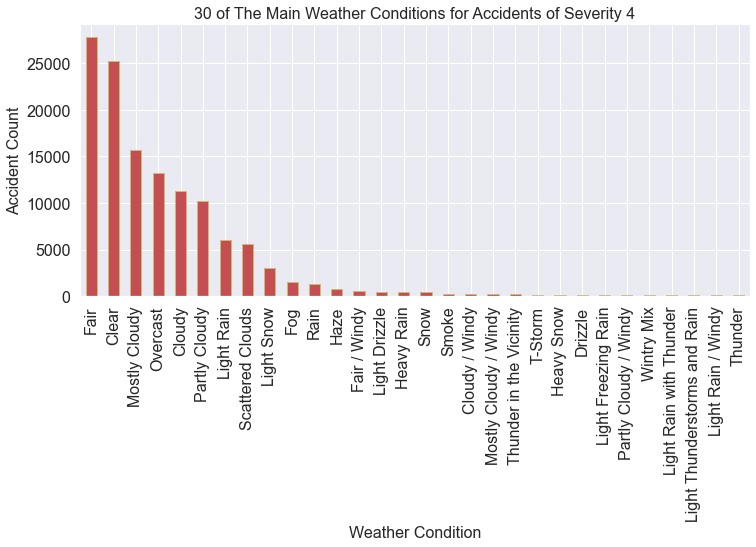

In [74]:
sns.set()
for s in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    df.loc[df["Severity"] == s]['Weather_Condition'].value_counts().sort_values(ascending=False).head(30).plot.bar(width=0.5,color='r',edgecolor='y',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('30 of The Main Weather Conditions for Accidents of Severity ' + str(s),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

### Observation : Irrespective of severity, most of the accidents happened in clear weather conditions followed by light rain and snowy.

#### we will check whether accidents are happening during day or night. For that, we will take 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight'and 'Astronomical_Twilight'.

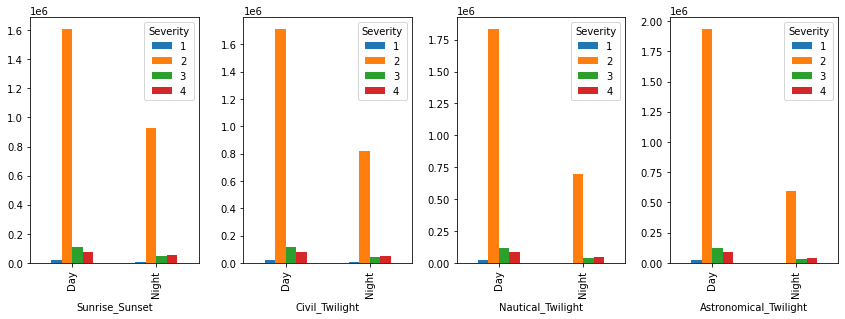

In [40]:
frame = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
fig, axs = plt.subplots(ncols=4, figsize=(12, 4))
fig.tight_layout()
for i,feature in enumerate(frame):
    accidents = df.groupby([feature, 'Severity']).size().reset_index().pivot(columns=
                                                            'Severity', index=feature, values=0)
    accidents.plot(kind='bar', ax=axs[i])

### Observation : Most of the accidents happened during the day but more of less severity and during the night, although the accidents happened less, the margin between the high and low severity is less.

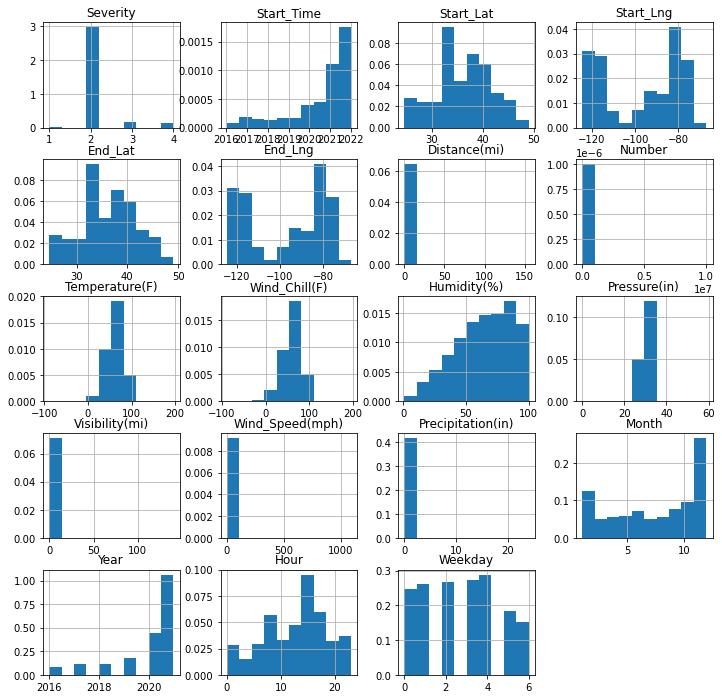

In [56]:
# We will see whether the numerical variables are normalized or not
df.hist(density=True, figsize=(12,12))
plt.show()

### Certain variables have too many categories and it is not wise to create dummies for them since it will increase dimensions to a large extent. Thus for those variables, we will do "Frequency Encoding" and give them a log transformation. The variables are:-
- County
- Zipcode
- City
- Airport_Code
- Street

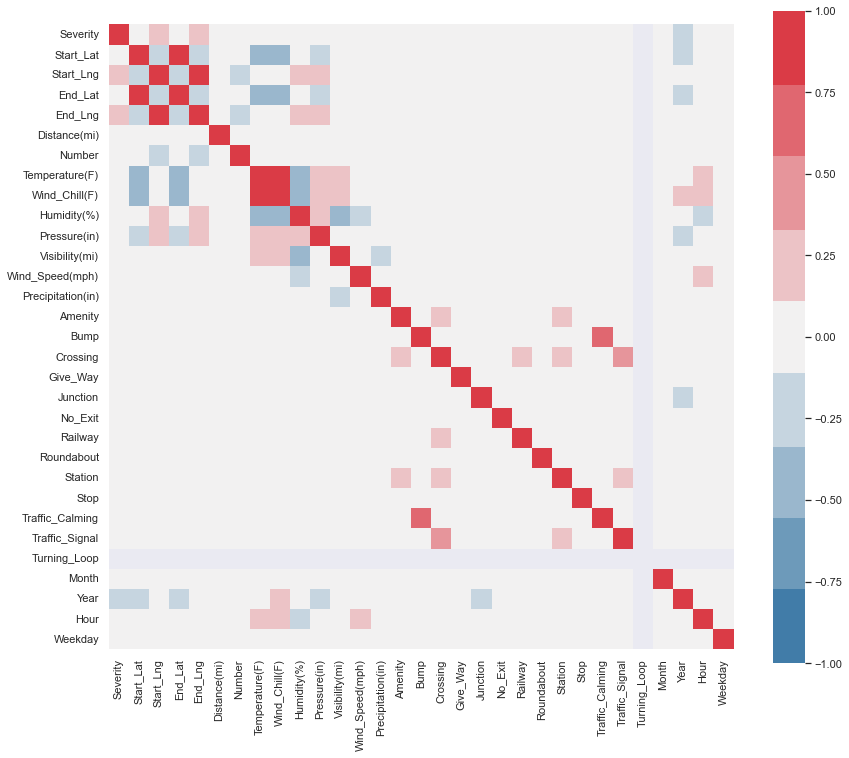

In [84]:
plt.rcParams['figure.figsize'] = (14,12)
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.show()

In [97]:
cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["Severity"])
 
cor_target

relevant_features = cor_target[cor_target>0.02]
relevant_features

Severity           1.000000
Start_Lat          0.089207
Start_Lng          0.114063
End_Lat            0.089209
End_Lng            0.114064
Distance(mi)       0.092140
Temperature(F)     0.045335
Wind_Chill(F)      0.097459
Humidity(%)        0.037802
Pressure(in)       0.043883
Wind_Speed(mph)    0.048382
Crossing           0.035382
Junction           0.045928
Month              0.070171
Year               0.310573
Name: Severity, dtype: float64

## Selecting highly correlated features

#### Boxplot to show if temperature has impact on the severity of the accident, 

<AxesSubplot:xlabel='Severity', ylabel='Temperature(F)'>

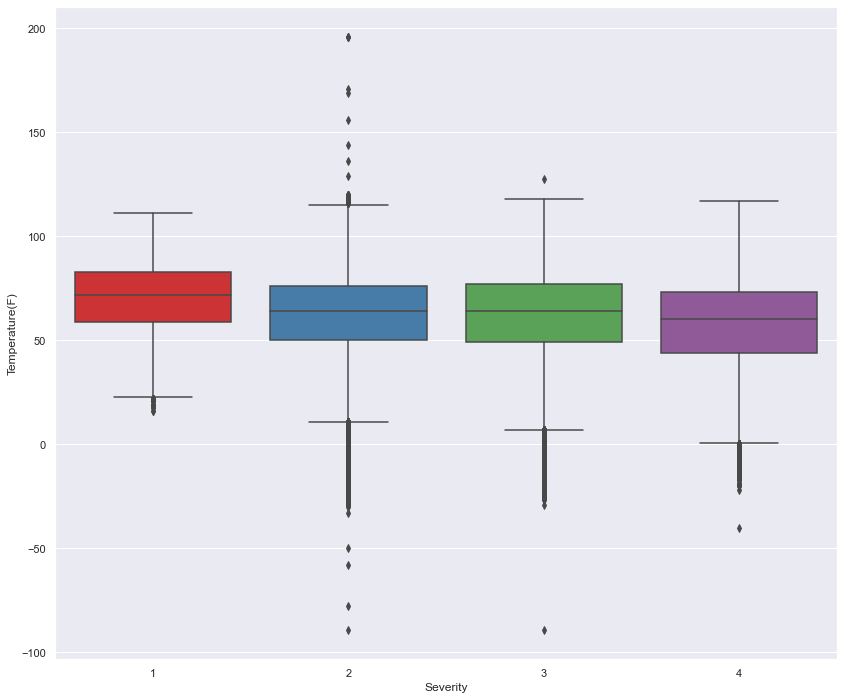

In [88]:
sns.boxplot(x="Severity", y="Temperature(F)", data=df, palette="Set1")